In [1]:
from sklearn.preprocessing import LabelBinarizer
from sklearn.metrics import classification_report
from lenet import LeNet
from tensorflow.keras.optimizers import SGD 
from tensorflow.keras.datasets import mnist
from tensorflow.keras import backend as K

import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt

In [2]:
print("[INFO] accessing MNIST...")
((trainData, trainLabels), (testData, testLabels)) = mnist.load_data()

print(trainData.shape)

trainData = trainData.reshape((trainData.shape[0], 28, 28, 1))
testData = testData.reshape((testData.shape[0], 28, 28, 1))

print(trainData.shape)

# scale data to the range of [0, 1]
trainData = trainData.astype("float32") / 255.0
testData = testData.astype("float32") / 255.0


# convert the labels from integers to vectors
# lb = LabelBinarizer()
# trainLabels = lb.fit_transform(trainLabels)
# testLabels = lb.transform(testLabels)
numclass = 10
trainLabels = tf.keras.utils.to_categorical(trainLabels, num_classes = numclass)
testLabels = tf.keras.utils.to_categorical(testLabels, num_classes = numclass)

[INFO] accessing MNIST...
(60000, 28, 28)
(60000, 28, 28, 1)


In [3]:
# initialize the optimizer and model
print("[INFO] compiling model...")
opt = SGD(lr=0.01)
model = LeNet.build(width=28, height=28, depth=1, classes=numclass)
model.compile(loss="categorical_crossentropy", optimizer=opt, metrics=["accuracy"])

# train the network
print("[INFO] training network...")
H = model.fit(trainData, trainLabels, validation_data=(testData, testLabels), batch_size=128, epochs=20, verbose=1)

[INFO] compiling model...
[INFO] training network...
Epoch 1/20
469/469 [==============================] - 32s 68ms/step - loss: 1.5354 - accuracy: 0.5842 - val_loss: 0.2943 - val_accuracy: 0.9167
Epoch 2/20
469/469 [==============================] - 30s 65ms/step - loss: 0.2763 - accuracy: 0.9215 - val_loss: 0.1902 - val_accuracy: 0.9453
Epoch 3/20
469/469 [==============================] - 30s 64ms/step - loss: 0.1878 - accuracy: 0.9445 - val_loss: 0.1403 - val_accuracy: 0.9599
Epoch 4/20
469/469 [==============================] - 30s 64ms/step - loss: 0.1482 - accuracy: 0.9555 - val_loss: 0.1245 - val_accuracy: 0.9621
Epoch 5/20
469/469 [==============================] - 29s 63ms/step - loss: 0.1172 - accuracy: 0.9651 - val_loss: 0.0942 - val_accuracy: 0.9717
Epoch 6/20
469/469 [==============================] - 29s 62ms/step - loss: 0.0998 - accuracy: 0.9716 - val_loss: 0.0900 - val_accuracy: 0.9726
Epoch 7/20
469/469 [==============================] - 30s 63ms/step - loss: 0.0883 

[INFO] evaluating network...
              precision    recall  f1-score   support

           0       0.98      0.99      0.99       980
           1       0.99      0.99      0.99      1135
           2       0.99      0.98      0.99      1032
           3       0.99      0.98      0.99      1010
           4       0.99      0.99      0.99       982
           5       0.99      0.98      0.99       892
           6       0.99      0.99      0.99       958
           7       0.99      0.98      0.98      1028
           8       0.97      0.98      0.98       974
           9       0.98      0.98      0.98      1009

    accuracy                           0.99     10000
   macro avg       0.99      0.99      0.99     10000
weighted avg       0.99      0.99      0.99     10000



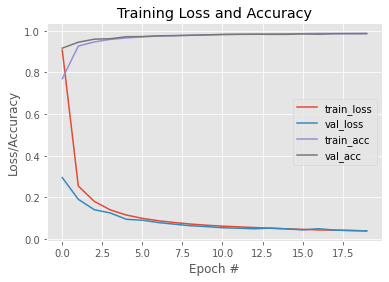

In [6]:
# evaluate the network
print("[INFO] evaluating network...")
predictions = model.predict(testData, batch_size=128)
cr = classification_report(testLabels.argmax(axis=1), predictions.argmax(axis=1),
                           target_names=[str(x) for x in range(numclass)])
print(cr)

# plot the trining loss and accuracy
plt.style.use("ggplot")
plt.figure()
plt.plot(np.arange(0, 20), H.history["loss"], label="train_loss")
plt.plot(np.arange(0, 20), H.history["val_loss"], label="val_loss")
plt.plot(np.arange(0, 20), H.history["accuracy"], label="train_acc")
plt.plot(np.arange(0, 20), H.history["val_accuracy"], label="val_acc")
plt.title("Training Loss and Accuracy")
plt.xlabel("Epoch #")
plt.ylabel("Loss/Accuracy")
plt.legend()
plt.show()

In [7]:
model.evaluate(testData, testLabels, verbose=0)

[0.038662753999233246, 0.9860000014305115]